<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Classifica%C3%A7%C3%A3o_de_Tumores_de_Mama_Utilizando_SVM_no_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Tumores de Mama Utilizando SVM no Colab

## Configuração do Ambiente no Google Colab

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carregamento e Exploração do Dataset

In [31]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Divisão dos Dados e Padronização

In [32]:
x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Scaler = StandardScaler()
x_train_scaler = Scaler.fit_transform(x_train)
x_test_scaler = Scaler.transform(x_test)

## Treinamento do Modelo SVM

In [35]:
model = SVC(kernel='linear')
model.fit(x_train_scaler, y_train)

SVC(kernel='linear')

## Avaliação do Modelo

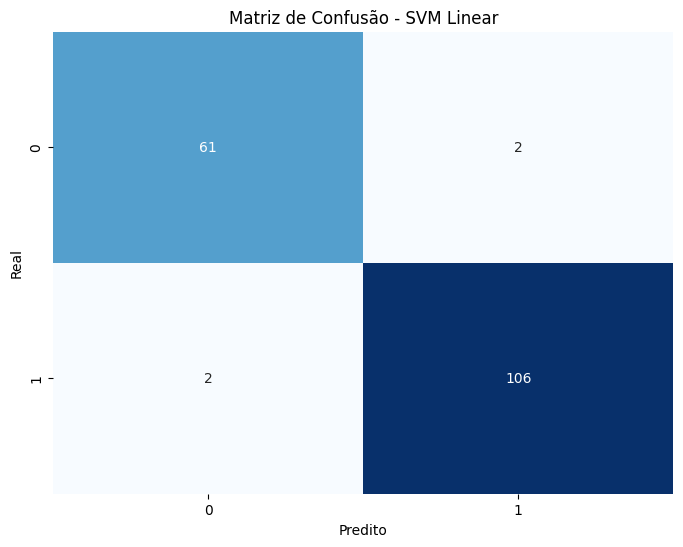

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [40]:
y_pred = model.predict(x_test_scaler)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

## Exploração de Diferentes Kernels

In [42]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}


grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train_scaler, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

## Melhores parametros

In [43]:
print('Melhores parametros', grid.best_params_)
print('Melhores estimadores', grid.best_estimator_)

Melhores parametros {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Melhores estimadores SVC(C=0.1, gamma=1, kernel='linear')


## Teste com melhores parametros

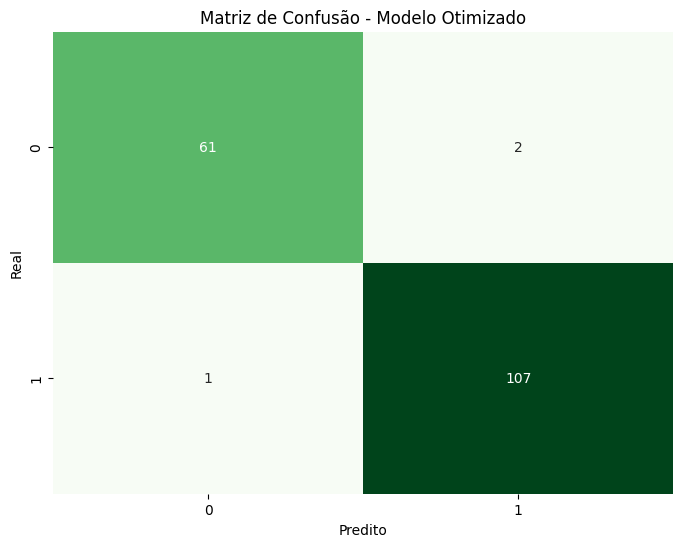

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [44]:
grid_predictions = grid.predict(x_test_scaler)

conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

## Perguntas para Reflexão

### 1. Qual foi o desempenho do modelo SVM com o kernel linear? Compare as métricas de acurácia, precisão, recall e F1-score.

### Resposta

*   Acurácia = 98%
*   Precisão
  *   Verdadeiro Positivo = 98%
  *   Verdadeiro Negativo = 97%
*   Recall = 97%
  *   Verdadeiro Positivo = 98%
  *   Verdadeiro Negativo = 97%
*   F1-score
  * Verdadeiro Positivo = 98%
  * Verdadeiro Negativo = 97%





### 2. Como o desempenho do modelo mudou ao utilizar um kernel não-linear (por exemplo, rbf ou poly)? Quais melhorias ou desafios surgiram?

### 3. A padronização dos dados influenciou de alguma forma o desempenho do modelo? O que aconteceria se os dados não fossem padronizados?

### 4. Quais outras estratégias de ajuste de hiperparâmetros ou pré-processamento poderiam ser aplicadas para melhorar o desempenho do SVM?